In [36]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import numpy as np
from sklearn import preprocessing
from numpy import linalg as LA
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import csv

In [37]:
#listing the directories(main dataset to be trained)
labels = os.listdir("C:/Users/vaish/Desktop/IITG INTERNSHIP/Mini Project/eigen_faces/eigen_faces/Main/dataset_LFW")
print(labels)

['Aaron_Eckhart', 'Adam_Sandler', 'Aishwarya_Rai', 'Akmal_Taher', 'Amitabh_Bachan', 'Arnold_Schwarzenegger', 'Atal_Bihari_Vajpayee', 'Barbara_Walters', 'Ben_Chandler', 'Brad_Miller', 'Brad_Pitt', 'Brian_Lara', 'Cameron_Diaz', 'Cate_Blanchett', 'Charles_Mathews', 'Charlie_Sheen', 'Christian_Bale', 'Daniel_Radcliffe', 'Dave_Matthews', 'David_Blaine', 'David_Myers', 'Donald_Trump', 'Donatella_Versace', 'Drew_Barrymore', 'Dwayne_Johnson', 'Elizabeth_Berkeley', 'Ellen_DeGeneres', 'Emma_Watson', 'George_Clooney', 'George_W_Bush', 'Hillary_Clinton', 'Justin_Timberlake', 'Kareena_Kapoor', 'Keith_Snyder', 'Martha_Stewart', 'Matt_Damon', 'Michael_Jackson', 'Michael_Schumacher', 'Oprah_Winfrey', 'Penelope_Cruz', 'Priyanka_Chopra', 'Reese_Witherspoon', 'Ricky_Martin', 'Ricky_Ponting', 'Robert_Lee_Yates_Jr', 'Russell_Simmons', 'Saddam_Hussein', 'Salma_Hayek', 'Serena_Williams', 'Shaun_Pollock', 'Sonia_Gandhi', 'Theodore_Tweed_Roosevelt', 'Tiger_Woods', 'Tom_Cruise', 'Urmila_Matondkar', 'Val_Ackerma

In [38]:
#listing the test dataset directory
labels = os.listdir("C:/Users/vaish/Desktop/IITG INTERNSHIP/Mini Project/eigen_faces/eigen_faces/Main/test")
print(labels)

['Aaron_Eckhart', 'Adam_Sandler', 'Aishwarya_Rai', 'Akmal_Taher', 'Amitabh_Bachan', 'Arnold_Schwarzenegger', 'Atal_Bihari_Vajpayee', 'Barbara_Walters', 'Ben_Chandler', 'Brad_Miller', 'Brad_Pitt', 'Brian_Lara', 'Cameron_Diaz', 'Cate_Blanchett', 'Charles_Mathews', 'Charlie_Sheen', 'Christian_Bale', 'Daniel_Radcliffe', 'Dave_Matthews', 'David_Blaine', 'David_Myers', 'Donald_Trump', 'Donatella_Versace', 'Drew_Barrymore', 'Dwayne_Johnson', 'Elizabeth_Berkeley', 'Ellen_DeGeneres', 'Emma_Watson', 'George_Clooney', 'George_W_Bush', 'Hillary_Clinton', 'Justin_Timberlake', 'Kareena_Kapoor', 'Keith_Snyder', 'Martha_Stewart', 'Matt_Damon', 'Michael_Jackson', 'Michael_Schumacher', 'Oprah_Winfrey', 'Penelope_Cruz', 'Priyanka_Chopra', 'Reese_Witherspoon', 'Ricky_Martin', 'Ricky_Ponting', 'Robert_Lee_Yates_Jr', 'Russell_Simmons', 'Saddam_Hussein', 'Salma_Hayek', 'Serena_Williams', 'Shaun_Pollock', 'Sonia_Gandhi', 'Theodore_Tweed_Roosevelt', 'Tiger_Woods', 'Tom_Cruise', 'Urmila_Matondkar', 'Val_Ackerma

In [4]:
#Capture images and labels into arrays
train_images = []  #main dataset/train images
train_labels = []  #folder names

for directory_path in glob.glob("dataset_LFW/*"):#directory into labels
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")): #listing all the images in jpg format
        print(img_path)
        img = cv2.imread(img_path,0)#reading the images from index 0 of all the images
    
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images) #numpy array of train images
train_labels = np.array(train_labels) #folder names of all the images to an array

Aaron_Eckhart
dataset_LFW\Aaron_Eckhart\Aaron_Eckhart_0003.jpg
Adam_Sandler
dataset_LFW\Adam_Sandler\Adam_Sandler_0002.jpg
dataset_LFW\Adam_Sandler\Adam_Sandler_0003.jpg
dataset_LFW\Adam_Sandler\Adam_Sandler_0004.jpg
dataset_LFW\Adam_Sandler\Adam_Sandler_0005.jpg
Aishwarya_Rai
dataset_LFW\Aishwarya_Rai\Aishwarya_Rai_0002.jpg
dataset_LFW\Aishwarya_Rai\Aishwarya_Rai_0003.jpg
Akmal_Taher
dataset_LFW\Akmal_Taher\Akmal_Taher_0009.jpg
Amitabh_Bachan
dataset_LFW\Amitabh_Bachan\amitabh-bachchan_0080.jpg
dataset_LFW\Amitabh_Bachan\amitabh-bachchan_009..jpg
dataset_LFW\Amitabh_Bachan\amitabh-bachchan_10.jpg
dataset_LFW\Amitabh_Bachan\amitabh_bachan_002.jpg
dataset_LFW\Amitabh_Bachan\amitabh_bachan_003.jpg
dataset_LFW\Amitabh_Bachan\amitabh_bachan_004.jpg
dataset_LFW\Amitabh_Bachan\amitabh_bachan_006.jpg
Arnold_Schwarzenegger
dataset_LFW\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0002.jpg
dataset_LFW\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0003.jpg
dataset_LFW\Arnold_Schwarzenegger\Arnold_Sc

Michael_Schumacher
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0001.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0002.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0003.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0004.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0005.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0006.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0007.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0008.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0009.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0010.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0011.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0012.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0013.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0014.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0015.jpg
dataset_LFW\Michael_Schumacher\Michael_Schumacher_0016.jpg
dataset_LFW\Michael_Schumacher\Michae

In [39]:
#Capture images and labels into arrays
test_images = [] #main test images
test_labels = [] #folder names

for directory_path in glob.glob("test/*"):#image folder into labels
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")): #listing all the images in jpg format
        print(img_path)
        img = cv2.imread(img_path,0) #reading the images from index 0 of all the images
    
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)  #numpy array of test images
test_labels = np.array(test_labels) #folder names of all the images

Aaron_Eckhart
test\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
Adam_Sandler
test\Adam_Sandler\Adam_Sandler_0001.jpg
Aishwarya_Rai
test\Aishwarya_Rai\Aishwarya_Rai_0001.jpg
Akmal_Taher
test\Akmal_Taher\Akmal_Taher_0001.jpg
Amitabh_Bachan
test\Amitabh_Bachan\amitabh_bachchan_001.jpg
Arnold_Schwarzenegger
test\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0001.jpg
Atal_Bihari_Vajpayee
test\Atal_Bihari_Vajpayee\Atal_Bihari_Vajpayee_0001.jpg
Barbara_Walters
test\Barbara_Walters\Barbara_Walters_0002.jpg
Ben_Chandler
test\Ben_Chandler\Ben_Chandler_0001.jpg
Brad_Miller
test\Brad_Miller\Brad_Miller_0001.jpg
Brad_Pitt
test\Brad_Pitt\Brad_Pitt_0001.jpg
Brian_Lara
test\Brian_Lara\Brian_Lara_0001.jpg
Cameron_Diaz
test\Cameron_Diaz\Cameron_Diaz_0001.jpg
Cate_Blanchett
test\Cate_Blanchett\Cate_Blanchett_0001.jpg
Charles_Mathews
test\Charles_Mathews\Charles_Mathews_0001.jpg
Charlie_Sheen
test\Charlie_Sheen\Charlie_Sheen_0001.jpg
Christian_Bale
test\Christian_Bale\Christian_Bale_0001.jpg
Daniel_Radcliffe
test\D

In [40]:
#Encode labels from text (folder names) to a number.
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [41]:
print(len(train_labels_encoded),len(test_labels_encoded))

262 58


In [42]:
#printing the labels along with their encoder
for i in range(len(train_labels_encoded)):
    print(train_labels[i],train_labels_encoded[i])
for i in range(len(test_labels_encoded)):
    print(test_labels[i], test_labels_encoded[i])

Aaron_Eckhart 0
Adam_Sandler 1
Adam_Sandler 1
Adam_Sandler 1
Adam_Sandler 1
Aishwarya_Rai 2
Aishwarya_Rai 2
Akmal_Taher 3
Amitabh_Bachan 4
Amitabh_Bachan 4
Amitabh_Bachan 4
Amitabh_Bachan 4
Amitabh_Bachan 4
Amitabh_Bachan 4
Amitabh_Bachan 4
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Arnold_Schwarzenegger 5
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari_Vajpayee 6
Atal_Bihari

In [43]:
print(train_labels_encoded.shape)
print(train_labels.shape)

(262,)
(262,)


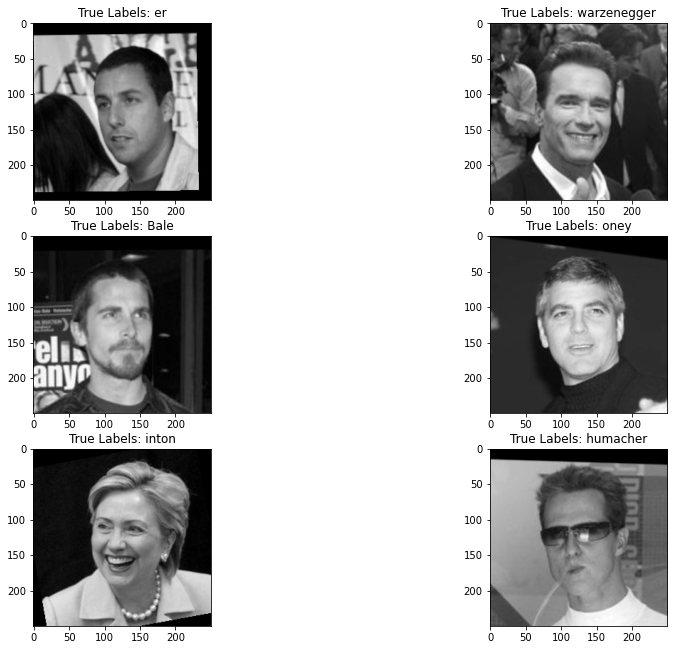

In [44]:
#plotting a few sample images
images = [1,25,70,100,125,170]

fig = plt.figure(figsize=(15, 15))

for i in range(len(images)):
    plt.subplot(4,2,i+1)
    plt.imshow(train_images[images[i]],cmap='gray')
    plt.title("True Labels: "+train_labels[images[i]][10:])
plt.show()

In [45]:
print(train_images[0].shape)

(250, 250)


In [46]:
#creating arrays
x_train=[] 
y_train=[]
for i in range(train_images.shape[0]):
  x_train.append(train_images[i].ravel()) #storing every train image as a vector
  y_train.append(train_labels_encoded[i])#storing  every train label

In [47]:
#creating arrays 
x_test=[] 
y_test=[]
for i in range(test_images.shape[0]):
  x_test.append(test_images[i].ravel())  #storing  every test image as a vector
  y_test.append(test_labels_encoded[i]) #storing  every test label 

In [48]:
#converting all to numpy arrays 
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
print(len(x_train[0]))

62500


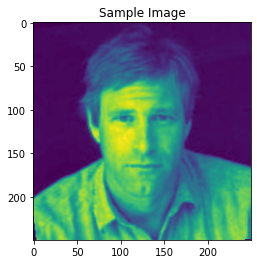

In [16]:
# Displaying an image
img2 = np.reshape(x_train[0,:], [250, 250])
img2 = img2.astype('uint8')

plt.imshow(img2)
plt.title('Sample Image')
plt.show()

In [50]:
# Calculating the mean of each feature
def feature_mean(data):
  mean = []
  for i in range(data.shape[1]):#cols
    sum = 0
    for j in range(data.shape[0]):#rows
      sum += data[j][i]        #calculating the sum of all the features
    sum = sum / data.shape[0] #dividing with the sum by the shape of the data 
    mean.append(sum)
  return mean

mu = feature_mean(x_train)

# Calculating the average images
def average_matrix(data,mean):
  A = []
  for i in range(data.shape[0]): 
    a = []
    for j in range(data.shape[1]):
      temp = data[i][j] - mu[j]  # calculation the average image by subtracting the mean from evry image 
      a.append(temp)
    A.append(a)

  A = np.array(A)
  return A.transpose()

A = average_matrix(x_train,mu)

In [51]:
print(A.shape)

(62500, 262)


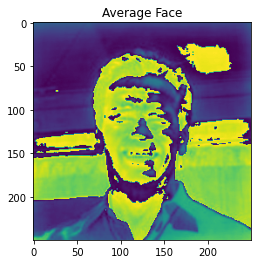

In [52]:
# Displaying an average image
img1 = np.reshape(A[:,24], (250, 250))
img1 = img1.astype('uint8')

plt.imshow(img1)
plt.title('Average Face')
plt.show()

In [53]:
# Computing the covariance matrix
C = np.dot(np.transpose(A),A)

# Calculating the eigen values and eigen vectors of the covariance matrix
lamda, v = LA.eig(C)
u = np.dot(A,v)

In [54]:
print(u.shape)

(62500, 262)


In [56]:
# The eigenfaces corresponding to the largest eigenvalues
ef = np.delete(u,np.s_[220:262],axis=1)

# Weights associated with each image
w = np.dot(x_train,ef)

In [57]:
print(ef.shape)

(62500, 220)


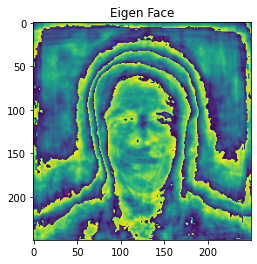

In [27]:
# Displaying an eigen image
img1 = np.reshape(ef[:,0], [250, 250])
img1 = img1.astype('uint8')

plt.imshow(img1)
plt.title('Eigen Face')
plt.show()

In [58]:
# Loading a random test image
img = cv2.imread(os.path.join("test/Amitabh_Bachan","amitabh_bachchan_001.jpg"))
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2 #error calculation
  e.append(math.sqrt(err))

# Getting the predicted output
y_pred = y_train[e.index(min(e))]  #storing the label with minimum error
print(y_pred, le.inverse_transform([y_pred]))

4 ['Amitabh_Bachan']


In [59]:
# Loading a random test image
img = cv2.imread(os.path.join("test/Atal_Bihari_Vajpayee","Atal_Bihari_Vajpayee_0001.jpg"))
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2 #error calculation 
  e.append(math.sqrt(err))

# Getting the predicted output
y_pred = y_train[e.index(min(e))] #storing the label with minimum error
print(y_pred, le.inverse_transform([y_pred]))

6 ['Atal_Bihari_Vajpayee']


In [60]:
# Loading a random test image
img = cv2.imread(os.path.join("test/Penelope_Cruz","Penelope_Cruz_0001.jpg"))
# Converting the RGB image to grayscale
im = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Convering the image to a numpy array and than vectorizing the array
im = np.array(im)
test = im.ravel()

# Calculating the weights
w_p = np.dot(test,ef)

# Finding the weights that best fit the image 
e = []
for i in range(w.shape[0]):
  err = 0
  for j in range(w.shape[1]):
    err = err + (w_p[j]-w[i][j])**2 #error calculation
  e.append(math.sqrt(err))

# Getting the predicted output
y_pred = y_train[e.index(min(e))]  #storing the label with minimum error
print(y_pred, le.inverse_transform([y_pred]))

27 ['Emma_Watson']


In [61]:
y_pred = []
for i in range(len(y_test)):
    
    # Calculating the weights
    w_p = np.dot(x_test[i],ef)
    
    #Finding the weights that best fit the image
    e=[]
    for j in range(w.shape[0]):
        err = 0
        for k in range(w.shape[1]):
            err = err + (w_p[k]-w[j][k])**2 #error calculation 
        e.append(math.sqrt(err))
    y_pred.append(y_train[e.index(min(e))]) #storing the label with minimum error
    
y_pred = np.array(y_pred)

In [62]:
cm = confusion_matrix(y_test, y_pred)

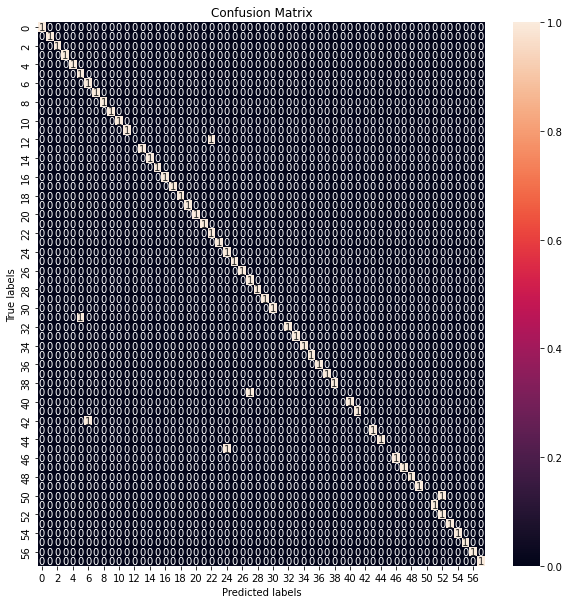

In [63]:
#plotting the confusion matrix 
fig = plt.figure(figsize = (10,10))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #add text on each cell if true
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [34]:
print(cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [35]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: "+str(acc*100)+"%")

Accuracy: 89.65517241379311%
